In [1]:
import torch
import torchvision
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader, TensorDataset, random_split

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff

In [2]:
heart = pd.read_csv('./heart.csv')
sat = pd.read_csv('./o2Saturation.csv')

In [3]:
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
heart.describe

<bound method NDFrame.describe of      age  sex  cp  trtbps  chol  fbs  ...  exng  oldpeak  slp  caa  thall  output
0     63    1   3     145   233    1  ...     0      2.3    0    0      1       1
1     37    1   2     130   250    0  ...     0      3.5    0    0      2       1
2     41    0   1     130   204    0  ...     0      1.4    2    0      2       1
3     56    1   1     120   236    0  ...     0      0.8    2    0      2       1
4     57    0   0     120   354    0  ...     1      0.6    2    0      2       1
..   ...  ...  ..     ...   ...  ...  ...   ...      ...  ...  ...    ...     ...
298   57    0   0     140   241    0  ...     1      0.2    1    0      3       0
299   45    1   3     110   264    0  ...     0      1.2    1    0      3       0
300   68    1   0     144   193    1  ...     0      3.4    1    2      3       0
301   57    1   0     130   131    0  ...     1      1.2    1    1      3       0
302   57    0   1     130   236    0  ...     0      0.0    1   

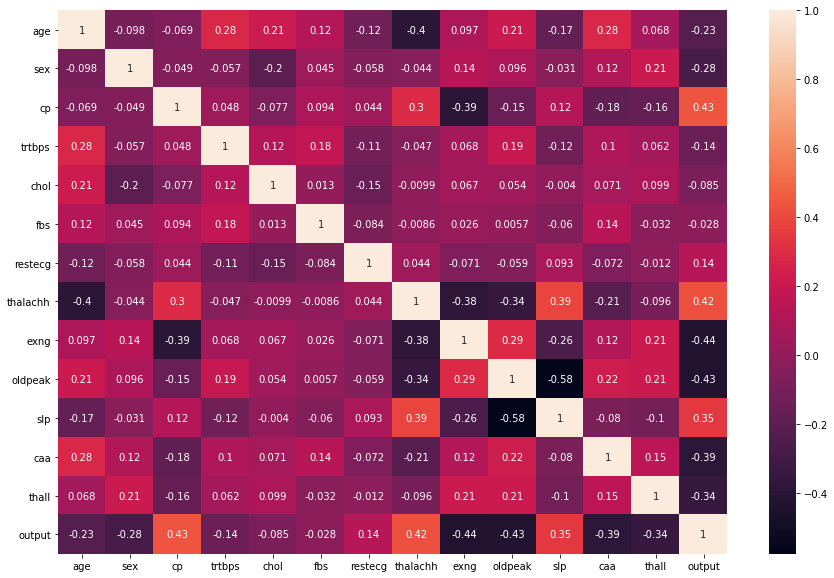

In [5]:
plt.figure(figsize=(15,10))
corr = heart.corr()
sns.heatmap(corr,annot=True)

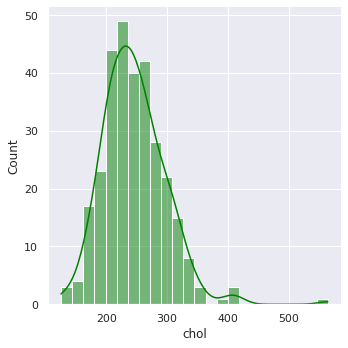

In [6]:
sns.set_theme()
sns.color_palette("flare", as_cmap=True)
sns.displot(heart['chol'], legend=True, kde = True, palette="flare", color="green")

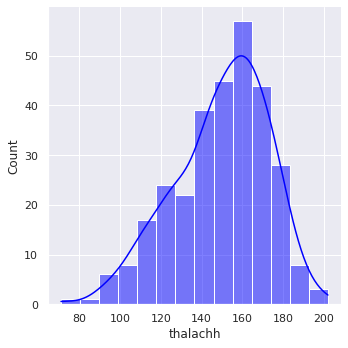

In [7]:
sns.set_theme()
sns.color_palette("flare", as_cmap=True)
sns.displot(heart['thalachh'], legend=True, kde = True, palette="flare", color="blue")

In [8]:
hist_data = [heart['chol'],heart['thalachh']]
group_labels = ['chol', 'thalachh'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels)
fig.show()

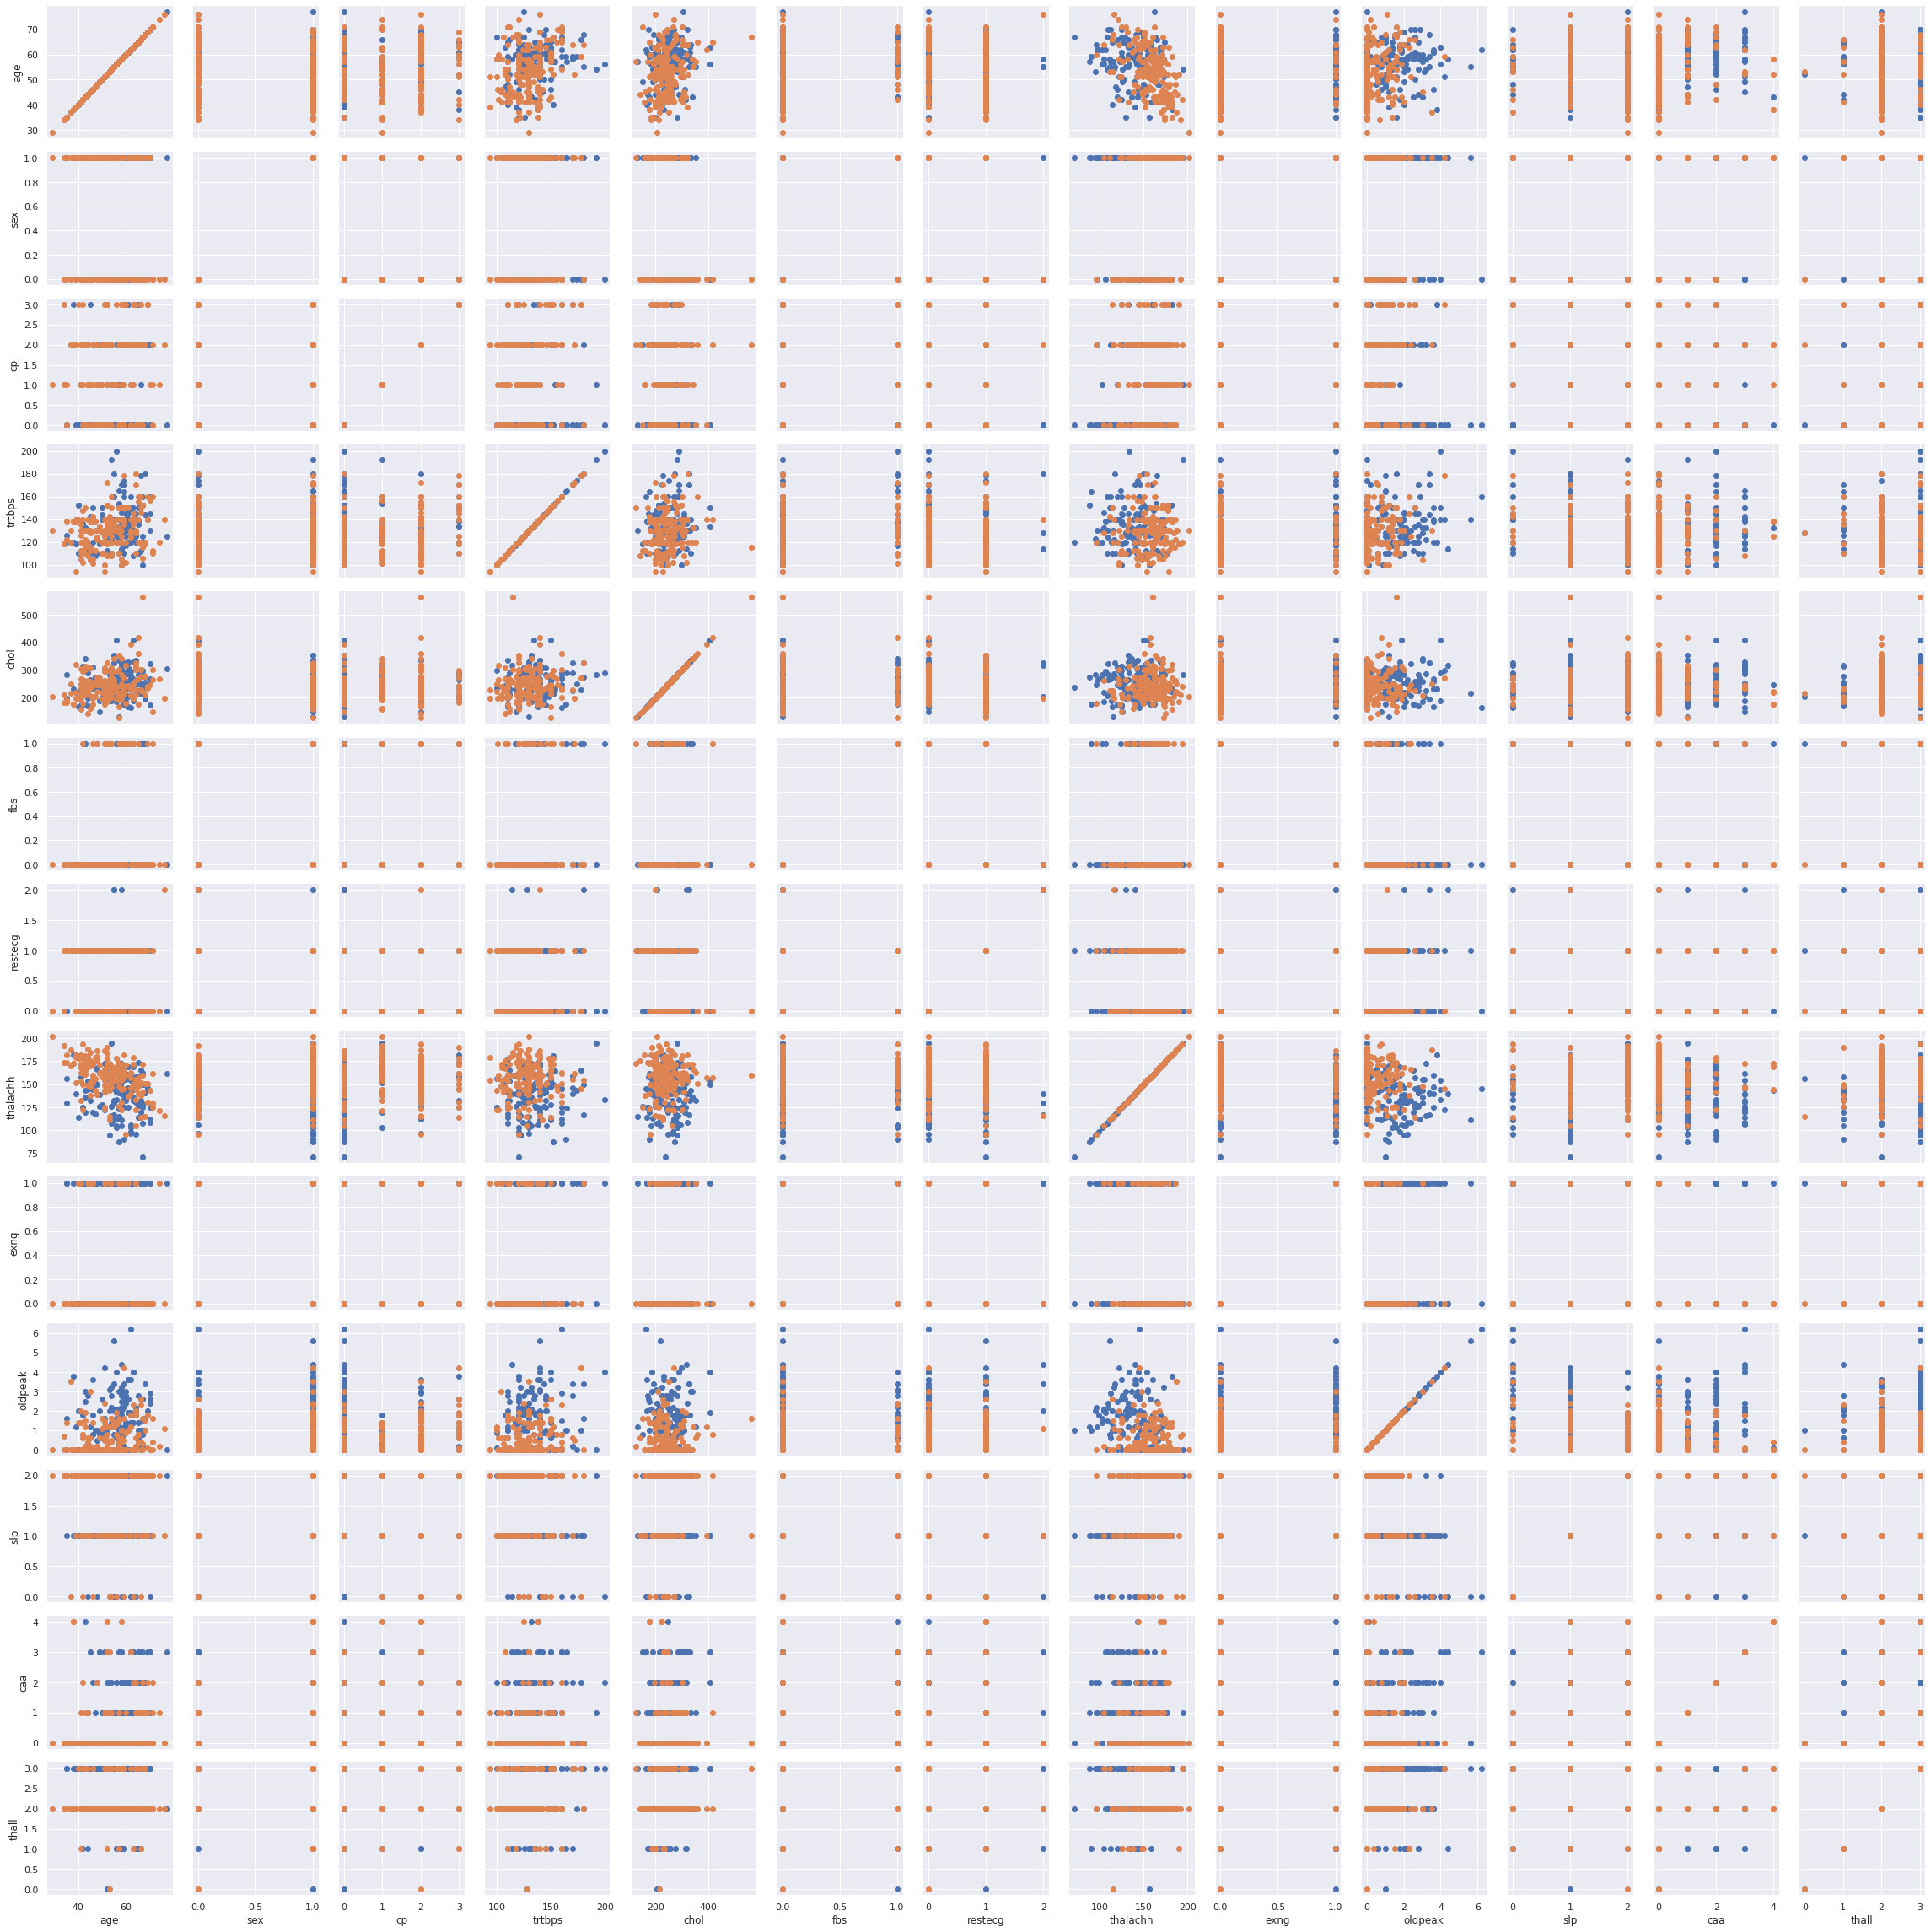

In [9]:
df_p=sns.PairGrid(heart,hue="output")
df_p.map(plt.scatter)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning:

`displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning:

`displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning:

`displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning:

`displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning:

`displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.

/usr/local/lib/python3.7/dist-packages/seaborn/dis

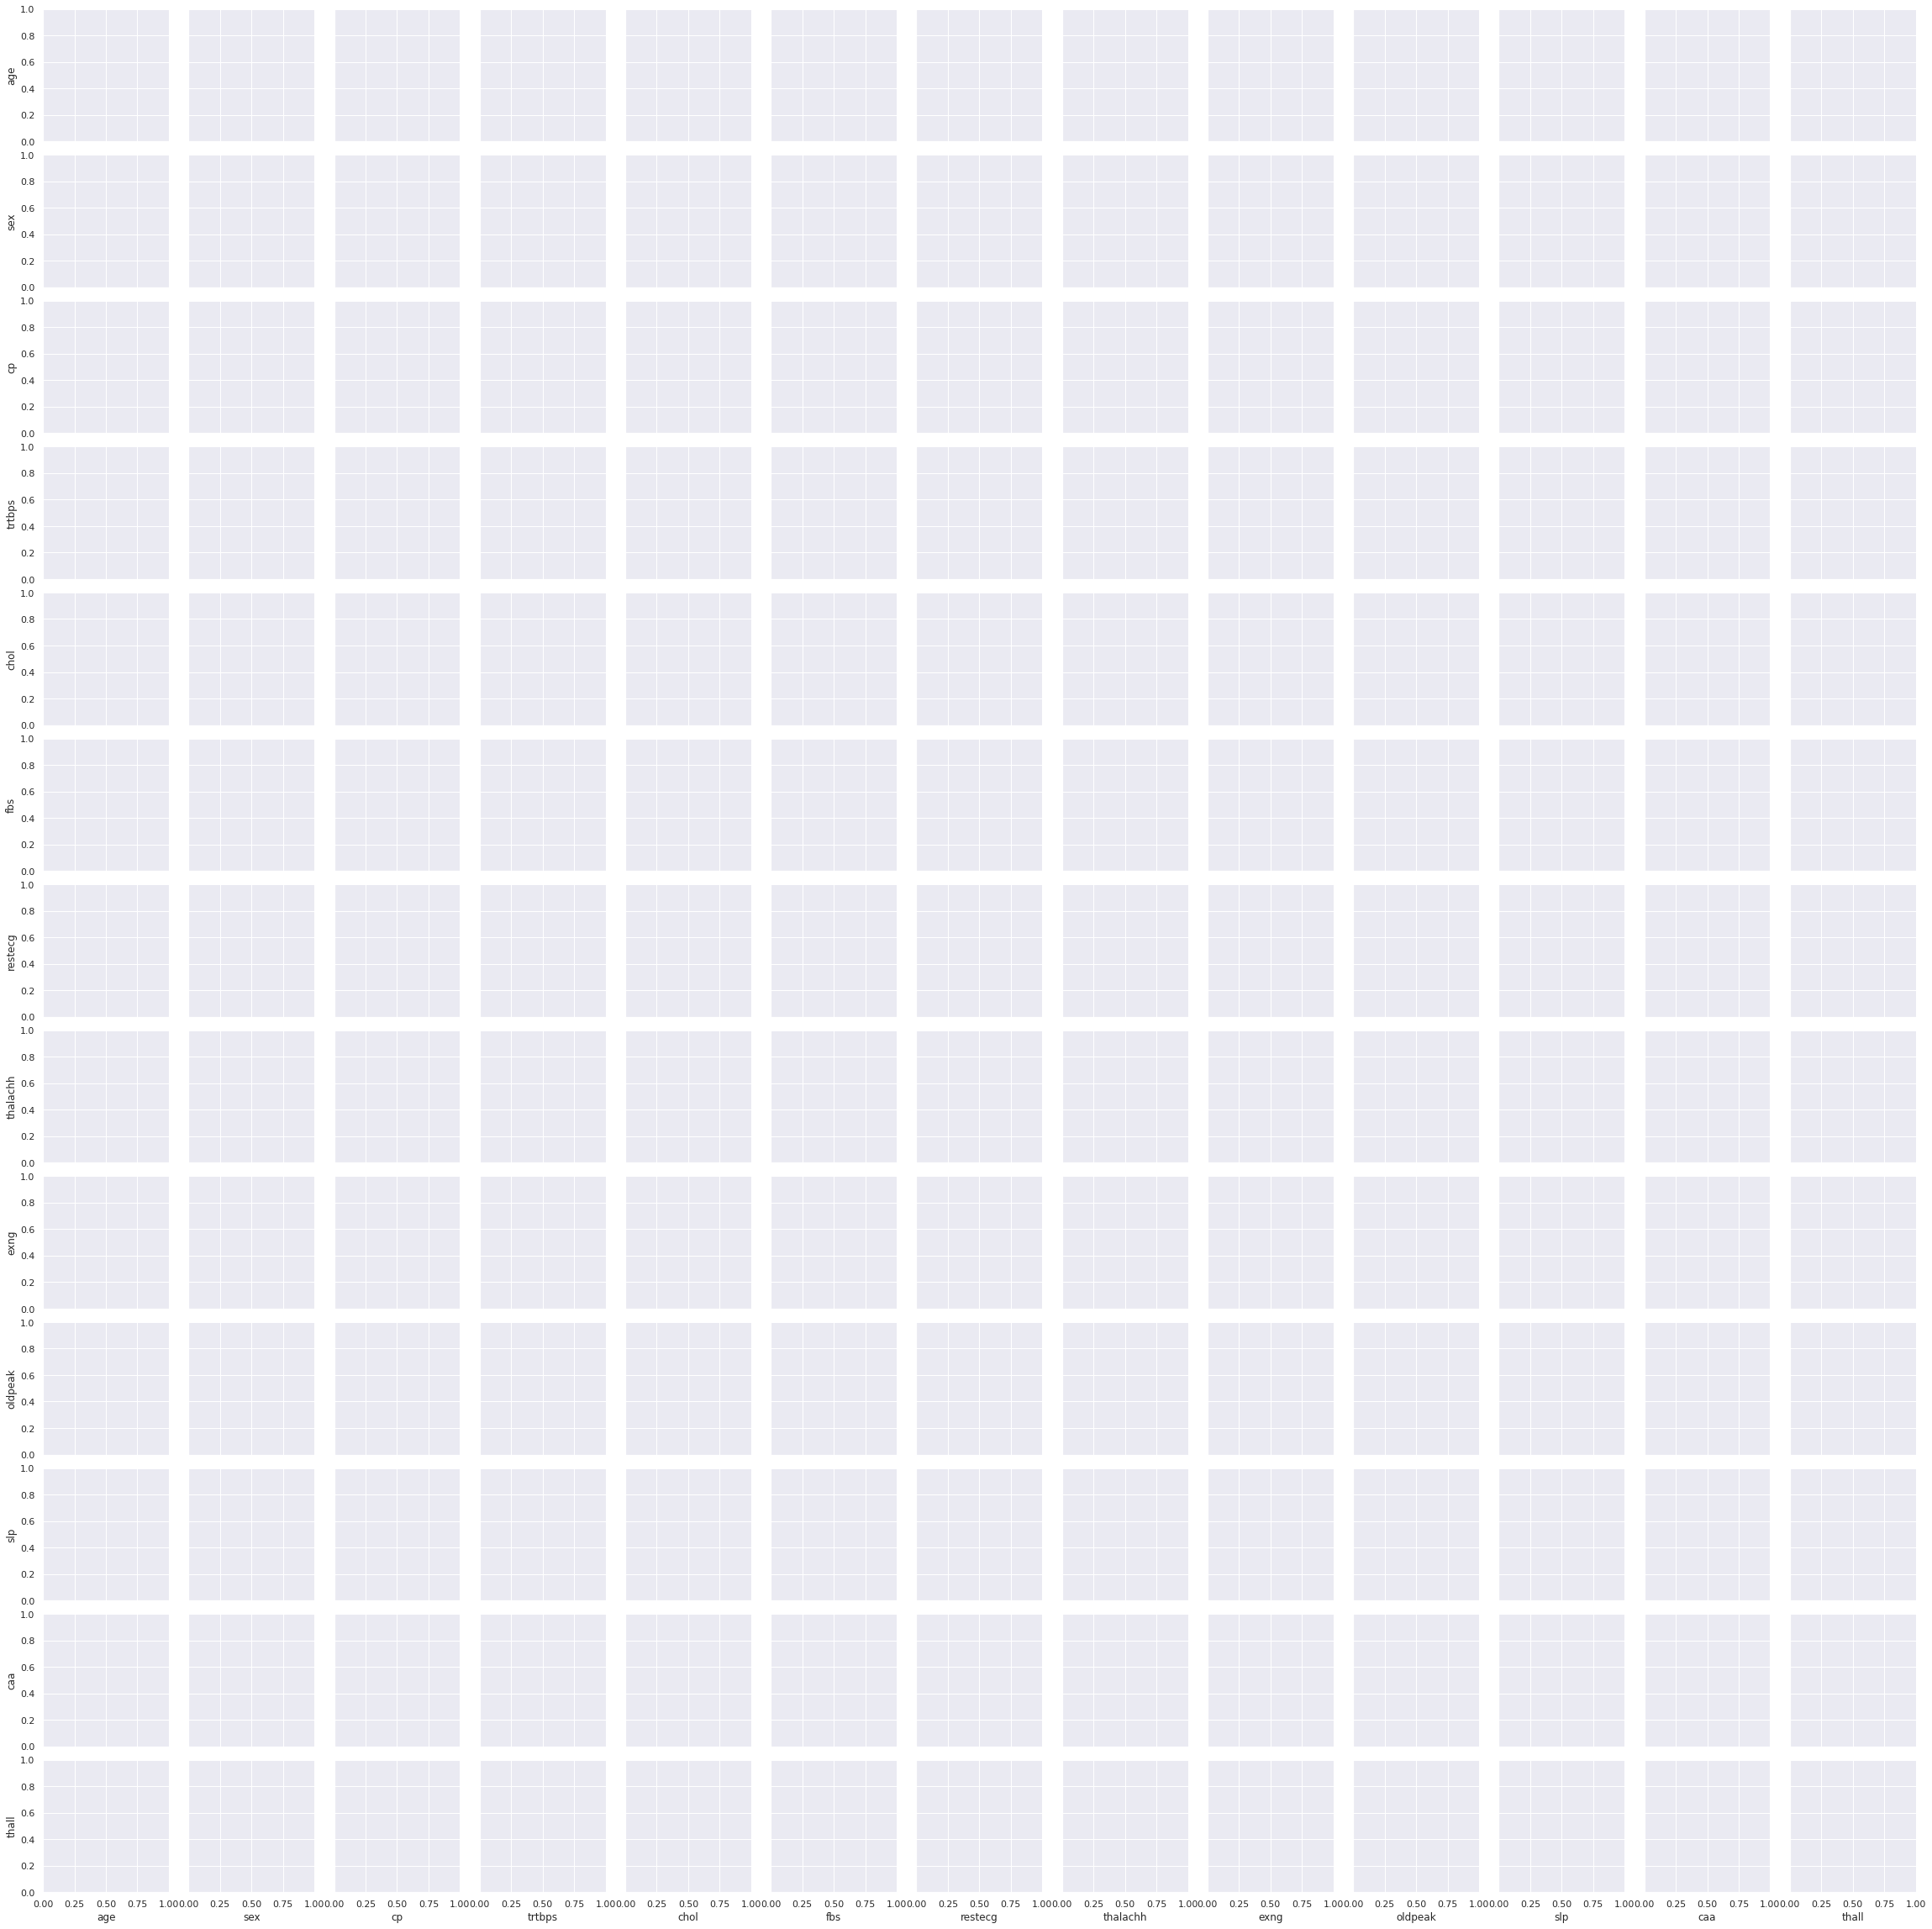

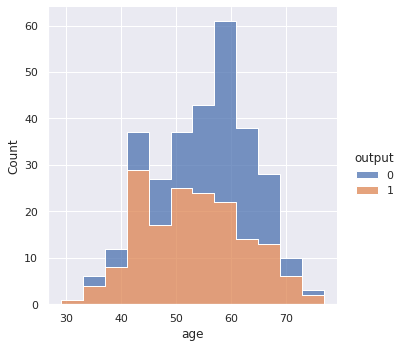

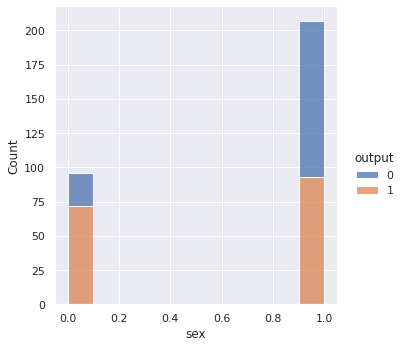

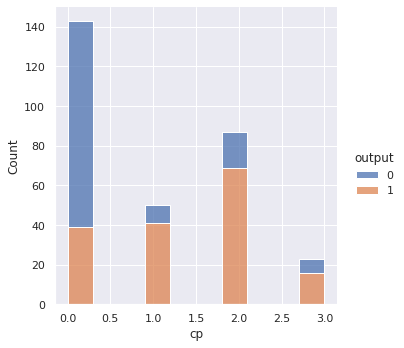

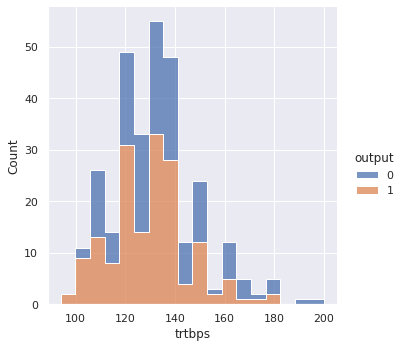

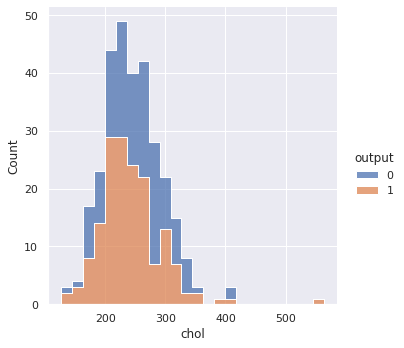

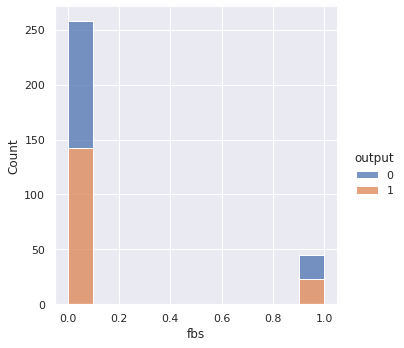

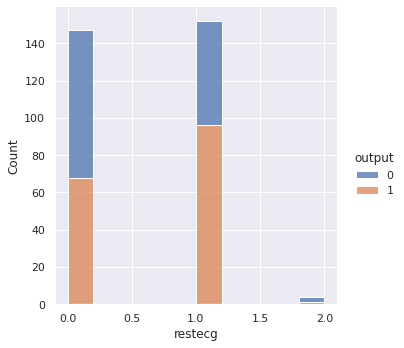

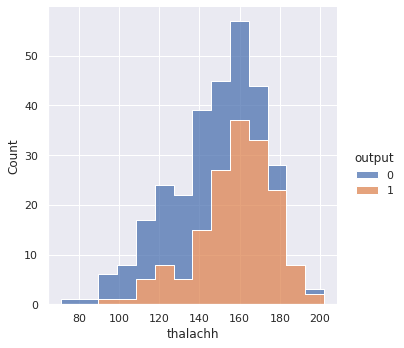

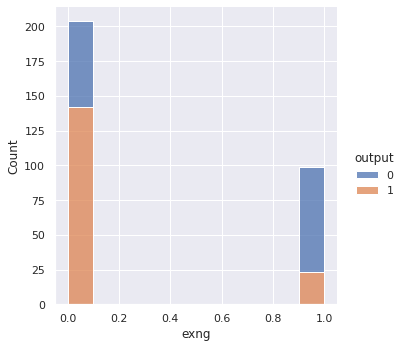

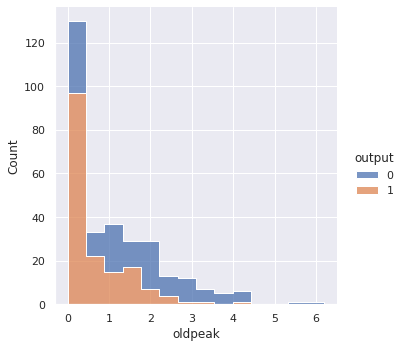

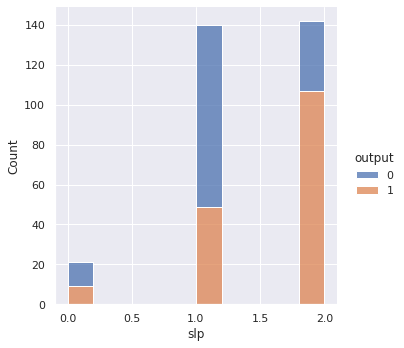

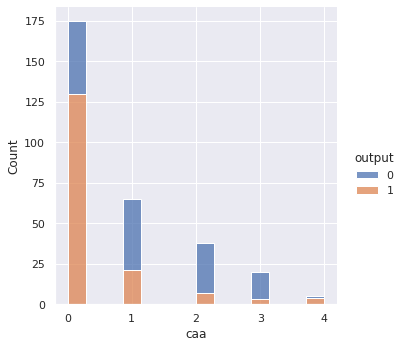

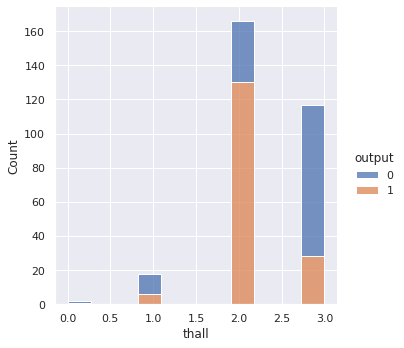

In [10]:
df_p=sns.PairGrid(heart,hue="output")
df_p.map_diag(sns.displot, multiple="stack", element="step")

In [11]:
def dataframe_to_arrays(dataframe, input_cols, output_cols, categorical_cols):
    """
    Convert DataFrame to numpy array. 
    Parameters
    ----------
    dataframe        : pd.DataFrame
    input_cols       : list
    output_cols      : list
    categorical_cols : list

    Returns 
    -------
    numpyArrays
    """
    # Make a copy of the original dataframe
    dataframe1 = dataframe.copy(deep=True)
    # # Convert non-numeric categorical columns to numbers
    for col in categorical_cols:
        dataframe1[col] = dataframe1[col].astype('category').cat.codes
    # Extract input & outupts as numpy arrays
    inputs_array = dataframe1[input_cols].to_numpy()
    targets_array = dataframe1[output_cols].to_numpy()
    return inputs_array, targets_array

In [12]:
input_cols = [item for item in heart.columns if item != 'output']
output_cols = ['output']
categorical_cols = []
input_array, target_array = dataframe_to_arrays(heart, input_cols, output_cols, categorical_cols)

In [13]:
inputs = torch.from_numpy(input_array).type(torch.float32)
targets = torch.from_numpy(target_array).type(torch.float32)

In [14]:
inputs.size(), targets.size()

(torch.Size([303, 13]), torch.Size([303, 1]))

In [15]:
inputs.dtype, targets.dtype

(torch.float32, torch.float32)

In [16]:
val_size = int(len(heart)*0.1)
train_size = len(heart)-val_size

In [17]:
dataset = TensorDataset(inputs, targets)

In [18]:
type(dataset)

torch.utils.data.dataset.TensorDataset

In [19]:
train_ds, val_ds = random_split(dataset,[train_size,val_size])

In [20]:
batch_size = 32

In [21]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [22]:
class heartAttack(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear1 = nn.Linear(input_size,output_size)
        
    def forward(self, xb):
        out = self.linear1(xb)
        return out

    def training_step(self, batch):
        inputs, targets = batch 
        # Generate predictions
        out = self(inputs)          
        # Calcuate loss
        loss = F.l1_loss(out,targets)
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        out = self(inputs)
        # Calculate loss
        loss = F.l1_loss(out,targets)
        # acc = accuracy(out,targets)
        # print(acc)
        return {'val_loss': loss.detach() }# , 'val_acc':acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        return {'val_loss': epoch_loss.item() }

    def epoch_end(self, epoch, result, num_epochs):
        # Print result every 20th epoch
        if (epoch+1) % 20 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))

In [23]:
PATH = './model'

In [24]:
model = heartAttack(13,1)

In [25]:
def evaluate(model, val_loader):
    """
    Evaluate the val loss of the model we trained.
    
    Parameters
    ----------
    model      : LR model we trained
    val_loader : DataLoader
    
    Results
    -------
    dictionary
    """
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [26]:
def accuracy(outputs, labels):
    """
    Calculate the accuracy of the trained model.
    Parameters
    ----------
    outputs : torch.tensors
    labels  : torch.tensors

    Returns
    -------
    int
    """
    _, preds = torch.max(outputs, dim=1)
    # preds = torch.as_tensor((preds - 0.4) > 0, dtype=torch.int32)
    # labels = torch.as_tensor(labels, dtype=torch.int32)
    labels = [torch.as_tensor(label, dtype=torch.int32) for label in labels]
    preds = [torch.as_tensor(out, dtype=torch.int32) for out in preds]
    count = 0
    for i in range(len(labels)):
        try:
          if labels[i] == preds[i]:
            count = count + 1
        except:
          pass
    return (count/len(preds))*100

In [27]:
def train(epochs, model, train_loader, val_loader, optimizer):
    history = []
    min = float('inf')
    for epoch in range(epochs):
        # Training Phase
        for batch in train_loader:
            optimizer.zero_grad()
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            
        # Validation phase
        result = evaluate(model, val_loader)
        print(result)
        if min > result['val_loss']:
            min = result['val_loss']
            torch.save(model.state_dict(), PATH)
        history.append(result)
    return history

In [28]:
evaluate(model, val_loader)

{'val_loss': 90.13336944580078}

In [29]:
import torch.optim as optim 
optimizer = optim.Adam(model.parameters())

In [43]:
history = train(100,model, train_loader, val_loader, optimizer)

{'val_loss': 1.0149502754211426}
{'val_loss': 0.8808850049972534}
{'val_loss': 0.9110347628593445}
{'val_loss': 0.7632339596748352}
{'val_loss': 0.7230636477470398}
{'val_loss': 0.7672297954559326}
{'val_loss': 0.6353560090065002}
{'val_loss': 0.7039521932601929}
{'val_loss': 0.5777475833892822}
{'val_loss': 0.615728497505188}
{'val_loss': 0.576053261756897}
{'val_loss': 0.5283143520355225}
{'val_loss': 0.5606032609939575}
{'val_loss': 0.4834979176521301}
{'val_loss': 0.5340907573699951}
{'val_loss': 0.49987852573394775}
{'val_loss': 0.4869173467159271}
{'val_loss': 0.45464861392974854}
{'val_loss': 0.4627102017402649}
{'val_loss': 0.4731315076351166}
{'val_loss': 0.4552469849586487}
{'val_loss': 0.45147889852523804}
{'val_loss': 0.4153335690498352}
{'val_loss': 0.42991045117378235}
{'val_loss': 0.43252289295196533}
{'val_loss': 0.4075019955635071}
{'val_loss': 0.43636590242385864}
{'val_loss': 0.4238288104534149}
{'val_loss': 0.4079040288925171}
{'val_loss': 0.38164523243904114}
{'val

In [31]:
model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [32]:
for i, j in zip(train_loader, val_loader):
  print(i, j)
  break

[tensor([[4.8000e+01, 1.0000e+00, 1.0000e+00, 1.1000e+02, 2.2900e+02, 0.0000e+00,
         1.0000e+00, 1.6800e+02, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
         3.0000e+00],
        [5.7000e+01, 1.0000e+00, 2.0000e+00, 1.5000e+02, 1.2600e+02, 1.0000e+00,
         1.0000e+00, 1.7300e+02, 0.0000e+00, 2.0000e-01, 2.0000e+00, 1.0000e+00,
         3.0000e+00],
        [4.4000e+01, 1.0000e+00, 1.0000e+00, 1.2000e+02, 2.2000e+02, 0.0000e+00,
         1.0000e+00, 1.7000e+02, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
         2.0000e+00],
        [5.8000e+01, 0.0000e+00, 1.0000e+00, 1.3600e+02, 3.1900e+02, 1.0000e+00,
         0.0000e+00, 1.5200e+02, 0.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00,
         2.0000e+00],
        [4.3000e+01, 1.0000e+00, 2.0000e+00, 1.3000e+02, 3.1500e+02, 0.0000e+00,
         1.0000e+00, 1.6200e+02, 0.0000e+00, 1.9000e+00, 2.0000e+00, 1.0000e+00,
         2.0000e+00],
        [3.9000e+01, 1.0000e+00, 2.0000e+00, 1.4000e+02, 3.2100e+02, 0.0000e+00

In [33]:
def predict_single(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(input)                # fill this
    prediction = predictions[0].detach()
    print("Input:", input)
    print("Target:", target)
    print("Prediction:", torch.as_tensor((prediction - 0.4) > 0, dtype=torch.int32))
    return (torch.as_tensor((prediction - 0.4) > 0, dtype=torch.int32)==torch.as_tensor(target, dtype=torch.int32))

In [34]:
input, target = val_ds[6]
predict_single(input, target, model)

Input: tensor([ 60.0000,   1.0000,   0.0000, 140.0000, 293.0000,   0.0000,   0.0000,
        170.0000,   0.0000,   1.2000,   1.0000,   2.0000,   3.0000])
Target: tensor([0.])
Prediction: tensor(1, dtype=torch.int32)


tensor([False])

In [35]:
def predict_single(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(input)                # fill this
    prediction = predictions[0].detach()
    print("Input:", input)
    print("Target:", target)
    print("Prediction:", torch.as_tensor((prediction - 0.4) > 0, dtype=torch.int32))

In [36]:
def get_accuracy(dataset):
    count = 0
    for i in range(len(dataset)):
        input, target = dataset[i]
        inputs = input.unsqueeze(0)
        predictions = model(input)                # fill this
        prediction = predictions[0].detach()
        if torch.as_tensor((prediction - 0.4) > 0, dtype=torch.int32)==torch.as_tensor(target, dtype=torch.int32):
            count = count + 1
    return {'accuracy' : 100*count/len(dataset) }

In [37]:
get_accuracy(val_ds)

{'accuracy': 36.666666666666664}

In [38]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.figure(figsize=(10,5))
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

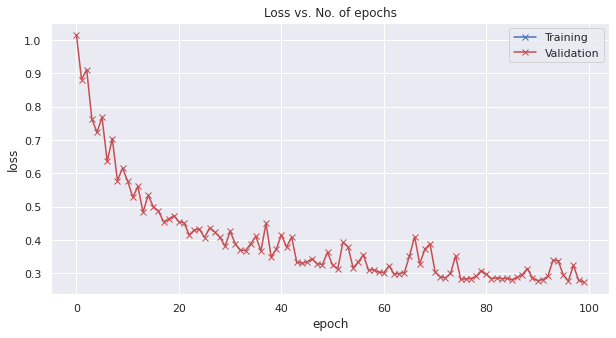

In [44]:
plot_losses(history)

In [40]:
def predict_result(age, sex,	cp,	trtbps,	chol,	fbs,	restecg,
                   thalachh,	exng,	oldpeak,	slp,	caa,	thall):
    """
    Parameters
    ----------
    age      : int
    sex	     : int
    cp	     : int
    trtbps	 : int
    chol	   : int
    fbs	     : int
    restecg	 : int
    thalachh : int
    exng	   : int
    oldpeak	 : int
    slp	     : int
    caa	     : int
    thall    : int

    Results
    -------
    boolean
    """
    data = []
    data.append({'age':age,
                 'sex':sex,
                 'cp':cp,
                 'trtbps':trtbps,
                 'chol':chol,
                 'fbs':fbs,
                 'restecg':restecg,
                 'thalachh':thalachh,
                 'exng':exng,
                 'oldpeak':oldpeak,
                 'slp':slp,
                 'caa':caa,
                 'thall':thall})
    input_a = pd.DataFrame(data).to_numpy()
    input = torch.from_numpy(input_a).type(torch.float32)
    dataset = TensorDataset(input)
    # inputs = dataset[0][0].unsqueeze(0)
    predictions = model(dataset[0][0])
    return torch.as_tensor((predictions - 0.4) > 0, dtype=torch.int32) > 0

In [45]:
predict_result(age = 63, sex= 1,cp=	3,trtbps=	145,chol=233,fbs=	1,restecg=0,thalachh=	150,exng=0,oldpeak=2.3,slp=0,caa=0,thall=1)

tensor([True])